In [47]:
import json
import matplotlib.pyplot as plt
from evaluate import load
import numpy as np

In [64]:
# pip install bert_score
bertscore = load("bertscore")

In [66]:
model_outputs = []
ground_truth = []
with open('results/Charmides..json') as f:
    results = json.load(f)
for res in results:
    if res['target'] is None:
        continue
    model_outputs.append([res['output']])
    ground_truth.append([res['target']])

In [98]:
scores = []
for i in range(len(model_outputs)):
    score = bertscore.compute(predictions=model_outputs[i], references=ground_truth[i], lang="en")
    print(i)
    scores.append(score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108


109


110
111


In [74]:
print(model_outputs[109], ground_truth[109])

['\n\n\n\n\n\n\n\n\n\n'] ['']


In [75]:
print(model_outputs[110], ground_truth[110])

['\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'] ['']


In [76]:
print(model_outputs[111], ground_truth[111])

['The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n  *   The context of the function.\n '] ['']


In [89]:
scores[0]

{'precision': [0.7881151437759399],
 'recall': [0.8457372784614563],
 'f1': [0.8159101009368896],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.30.2)'}

In [93]:
avg_f1_score = 0
avg_precision_score = 0
avg_recall_score = 0
for i in range(len(scores)):
    avg_f1_score += scores[i]['f1'][0]
    avg_precision_score += scores[i]['precision'][0]
    avg_recall_score += scores[i]['recall'][0]
    
avg_f1_score = avg_f1_score/len(scores)
avg_precision_score = avg_precision_score/len(scores)
avg_recall_score = avg_recall_score/len(scores)

In [96]:
print(f'Average F1 score is {avg_f1_score}')
print(f'Average Precision score is {avg_precision_score}')
print(f'Average Recall score is {avg_recall_score}')

Average F1 score is 0.7880056617515427
Average Precision score is 0.7435963664736066
Average Recall score is 0.8397667088678905


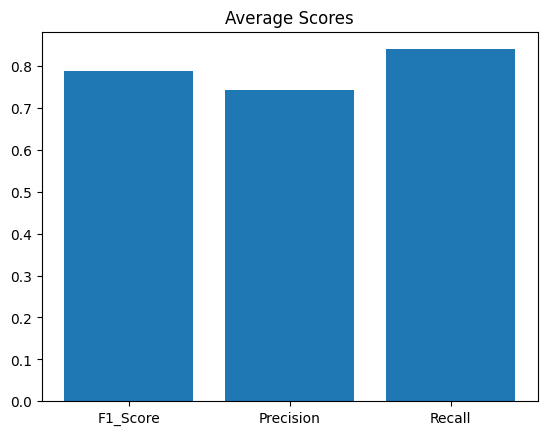

In [94]:
# Visualizations  
plt.bar(['F1_Score', 'Precision', 'Recall'], [avg_f1_score, avg_precision_score, avg_recall_score])
plt.title('Average Scores')
plt.savefig('BERTscores.png')

In [100]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [102]:
model_str_outputs = []
ground_str_truth = []
with open('results/Charmides..json') as f:
    results = json.load(f)
for res in results:
    if res['target'] is None:
        continue
    model_str_outputs.append(res['output'])
    ground_str_truth.append(res['target'])

In [104]:
rouge_scores = []
for i in range(len(model_outputs)):
    rouge_score = scorer.score(model_str_outputs[i], ground_str_truth[i])
    print(i)
    rouge_scores.append(rouge_score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


In [105]:
rouge_scores[0]

{'rouge1': Score(precision=0.5, recall=0.042105263157894736, fmeasure=0.07766990291262135),
 'rougeL': Score(precision=0.375, recall=0.031578947368421054, fmeasure=0.05825242718446602)}

In [108]:
rouge_scores[0]['rouge1'][1]

0.042105263157894736

In [109]:
avg_rouge1_f1_score = 0
avg_rouge1_precision_score = 0
avg_rouge1_recall_score = 0

avg_rougeL_f1_score = 0
avg_rougeL_precision_score = 0
avg_rougeL_recall_score = 0

for i in range(len(rouge_scores)):
    avg_rouge1_f1_score += rouge_scores[i]['rouge1'][2]
    avg_rouge1_precision_score += rouge_scores[i]['rouge1'][0]
    avg_rouge1_recall_score += rouge_scores[i]['rouge1'][1]
    
    avg_rougeL_f1_score += rouge_scores[i]['rougeL'][2]
    avg_rougeL_precision_score += rouge_scores[i]['rougeL'][0]
    avg_rougeL_recall_score += rouge_scores[i]['rougeL'][1]
    
    
avg_rouge1_f1_score = avg_rouge1_f1_score/len(rouge_scores)
avg_rouge1_precision_score = avg_rouge1_precision_score/len(rouge_scores)
avg_rouge1_recall_score = avg_rouge1_recall_score/len(rouge_scores)

avg_rougeL_f1_score = avg_rougeL_f1_score/len(rouge_scores)
avg_rougeL_precision_score = avg_rougeL_precision_score/len(rouge_scores)
avg_rougeL_recall_score = avg_rougeL_recall_score/len(rouge_scores)

In [ ]:
# Visualizations  
plt.bar(['F1_Score', 'Precision', 'Recall'], [avg_f1_score, avg_precision_score, avg_recall_score])
plt.title('Average Scores')
plt.savefig('ROUGEscores.png')

In [117]:
print(f'Average F1 score for rouge1 and rougeL are {avg_rouge1_f1_score}, {avg_rougeL_f1_score}')
print(f'Average Precision for rouge1 and rougeL are  {avg_rouge1_precision_score}, {avg_rougeL_precision_score}')
print(f'Average Recall for rouge1 and rougeL are {avg_rouge1_recall_score}, {avg_rougeL_recall_score}')

Average F1 score for rouge1 and rougeL are 0.03206827928130345, 0.027078456277548898
Average Precision for rouge1 and rougeL are  0.19762057480198125, 0.1865673748690241
Average Recall for rouge1 and rougeL are 0.02410617501716299, 0.019619184066997475


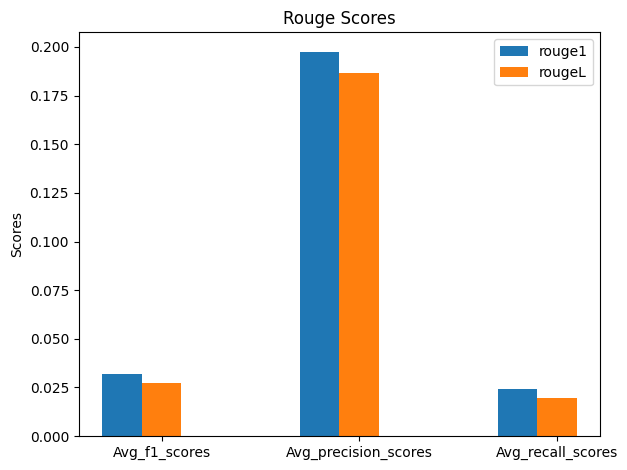

In [116]:
categories = ['Avg_f1_scores', 'Avg_precision_scores', 'Avg_recall_scores']
rouge1 = [avg_rouge1_f1_score, avg_rouge1_precision_score, avg_rouge1_recall_score]
rougeL = [avg_rougeL_f1_score, avg_rougeL_precision_score, avg_rougeL_recall_score]

# Number of categories
num_categories = len(categories)

# Width of a bar
bar_width = 0.2

# Bar positions for each category
x = np.arange(num_categories)

# Create subplots to group F1, Precision, and Recall scores
fig, ax = plt.subplots()

# Grouped bar for F1 scores
plt.bar(x - bar_width, rouge1, bar_width, label='rouge1', align='center')

# Grouped bar for Precision scores
plt.bar(x, rougeL, bar_width, label='rougeL', align='center')

# Set x-axis labels
plt.xticks(x, categories)

# Set y-axis label
plt.ylabel('Scores')

# Set the title for the chart
plt.title('Rouge Scores')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()